<a href="https://colab.research.google.com/github/amanullah20/ML/blob/main/optimizing_co2_emission_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Table of Contents**

####**01. Introduction**  

 - Overview of CO2 Emission Problem

 - Objectives of the Study
Dataset Description

#### **02. Data Preprocessing**

 - Understanding the Dataset Structure

 - Handling Missing Values

 - Encoding Categorical Variables

 - Splitting the Data into Training and Test Sets

####**03. Exploratory Data Analysis (EDA)**

 - Visualizing Relationships between Variables

 - Checking for Correlations

 - Identifying Patterns and Trends in the Data

####**04. Modeling**

 - Linear Regression Model

   - Model Training

  - Predictions on Test Set

   - Model Evaluation (MSE, R² Score)

 - Advanced Regression Models (if applicable)

   - Ridge Regression

  - Lasso Regression

  - Decision Trees

 - Model Comparison and Selection

####**05. Feature Engineering (Optional)**

 - Polynomial Features

 - Interaction Terms

 - Feature Scaling

####**06. Model Optimization**

 - Hyperparameter Tuning

 - Cross-Validation

####**07. Results and Discussion**

 - Model Performance Metrics

 - Analysis of Predicted vs. Actual CO2 Emissions

 - Limitations of the Model

####**08. Conclusion and Recommendations**

 - Summary of Findings

- Potential
Improvements

- Future Work

###**Introduction**

####**Overview of CO2 Emission Problem**

Carbon dioxide (CO2) emissions from vehicles are a significant contributor to global greenhouse gas emissions, impacting climate change and air quality. With increasing urbanization and reliance on personal and commercial vehicles, the transportation sector is becoming a critical focus area for sustainability efforts. Monitoring and predicting CO2 emissions for vehicles is vital to inform policy decisions, improve vehicle design, and promote environmental sustainability.

Understanding the relationship between a vehicle's characteristics (such as weight, fuel volume, and model type) and its CO2 emissions is essential for both manufacturers and policymakers. Accurate predictions can help in setting emissions standards, guiding consumer choices, and fostering innovation in green technologies.

_____________________________________________

###**Objectives of the Study**

**The primary objectives of this study are:**

01. To analyze the relationship between a vehicle's physical attributes (such as weight and volume) and its CO2 emissions.

02. To develop a predictive model using Linear Regression that estimates CO2 emissions based on independent variables like weight, fuel volume, and car model.

03. To evaluate the performance of the model using metrics such as Mean Squared Error (MSE) and R² score.

04. To provide insights that could help manufacturers optimize vehicle design for reduced emissions.

______________________________________________



###**Dataset Description**

The dataset used in this study contains information on various cars, including their specifications and CO2 emissions. It includes the following columns:

**01. Car:** The brand or make of the car (e.g., Toyota, Mercedes).

**02. Model:** The specific model of the car (e.g., Aygo, Cooper).

**03. Volume:** The fuel volume of the vehicle in cubic centimeters.

**04. Weight:** The weight of the vehicle in kilograms.

**05. CO2:** The amount of CO2 emitted by the vehicle, measured in grams per kilometer (g/km).

______________________________________________

**Dataset Summary:**

 - **Total entries:** 36

 - **Categorical variables:** `Car`, `Model`

 - **Numerical variables:** `Volume`, `Weight`, `CO2`

 - **No missing values**: ensuring clean and ready-to-use data.

### Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler


In [4]:
# Overview of the dataset
file_path = '/content/DATA.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Overview:")
print(data.head())

# Objectives of the Study
objectives = [
    "Analyze the relationship between vehicle attributes (weight, volume, model) and CO2 emissions.",
    "Develop a predictive model for CO2 emissions using linear regression.",
    "Evaluate the model's performance using MSE and R² metrics.",
    "Provide actionable insights to optimize vehicle design for lower emissions."
]

Dataset Overview:
          Car       Model  Volume  Weight  CO2  Unnamed: 5
0      Toyota        Aygo    1000     790   99         NaN
1  Mitsubishi  Space Star    1200    1160   95         NaN
2       Skoda      Citigo    1000     929   95         NaN
3        Fiat         500     900     865   90         NaN
4        Mini      Cooper    1500    1140  105         NaN


In [5]:
columns_description = {
    "Car": "The brand or manufacturer of the car.",
    "Model": "The specific model of the car.",
    "Volume": "Fuel volume of the vehicle (in cc).",
    "Weight": "Weight of the vehicle (in kg).",
    "CO2": "CO2 emissions of the vehicle (in g/km)."
}

In [6]:
print("\nDataset Description:")
for col, desc in columns_description.items():
    print(f"- {col}: {desc}")

# Basic dataset summary
print("\nDataset Summary:")
print(data.info())


Dataset Description:
- Car: The brand or manufacturer of the car.
- Model: The specific model of the car.
- Volume: Fuel volume of the vehicle (in cc).
- Weight: Weight of the vehicle (in kg).
- CO2: CO2 emissions of the vehicle (in g/km).

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB
None


### **Data Preprocessing**

#### **Understanding the Dataset Structure**

Before applying any machine learning model, it is essential to understand the dataset's structure and characteristics. The dataset provided contains the following columns:

**01. Car:**
Represents the brand or manufacturer of the car.

**02. Model: **Specifies the model of the car.

**03. Volume:** Denotes the fuel volume (independent variable).

**04. Weight:** Indicates the weight of the vehicle (independent variable).

**05. CO2:** Represents the amount of CO2 emissions in grams per kilometer (target variable).

**Key Observations:**

 - The dataset consists of **36 entries** and 5 columns.

 - Two columns **(Car and Model)** are categorical variables, while the others are numerical.

 - The dataset is **clean and free** from missing values.

 ____________________________________________

### **Handling Missing Values**

To ensure data integrity, missing values need to be identified and addressed. In this dataset:

 - **No missing values** were found in any of the columns.

 - Therefore, **no imputation or removal** of rows/columns was required.

 __________________________________________

### **Encoding Categorical Variables**

Machine learning models require numerical input, so categorical variables need to be encoded. In this dataset:

01. **Car and Model** columns were encoded using **one-hot encoding,** where:

 - Each category in these columns is transformed into a **binary column** (0 or 1).

 - This approach avoids introducing **ordinal relationships** among categories.

**For example:**

 - **Car** column might be transformed into **Car_Mercedes, Car_Toyota,** etc.

 - **Model** column might be transformed into **Model_Aygo, Model_Fiesta,** etc.

This increases the dimensionality of the data but ensures compatibility with the linear regression model.
_______________________________________________

### **Splitting the Data into Training and Test Sets**

To evaluate the model's performance, the dataset was split into:

 - **Training Set (80%):** Used to train the model.

 - **Test Set (20%)**: Used to assess model performance on unseen data.

The splitting process ensures that:

 - The training set provides **sufficient data** for the model to learn patterns.

- The test set remains **unseen during training,** offering a realistic evaluation of the model's performance.

The **`train_test_split` **function from the `sklearn.model_selection` module was used for this purpose, with a **random state** set to ensure reproducibility.

In [7]:
print("Dataset Structure:")
print(data.info())

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB
None


In [8]:
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 5'], errors='ignore') # Verbose

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64


In [9]:
# Encoding Categorical Variables using One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['Car', 'Model'], drop_first=True)
data_encoded.head()

,Volume,Weight,CO2,Car_BMW,Car_Fiat,Car_Ford,Car_Honda,Car_Hundai,Car_Hyundai,Car_Mazda,...,Model_Octavia,Model_Rapid,Model_S60,Model_SLK,Model_Space Star,Model_Swift,Model_Up!,Model_V70,Model_XC70,Model_Zafira
0,1000,790,99,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1200,1160,95,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,1000,929,95,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,900,865,90,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1500,1140,105,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Splitting the Data into Training and Test Sets
# Define independent variables (X) and target variable (y)
X = data_encoded.drop(columns=['CO2'])
y = data_encoded['CO2']

In [11]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shapes of resulting datasets
print("\nShapes of Training and Test Sets:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Shapes of Training and Test Sets:
X_train: (28, 52), X_test: (8, 52)
y_train: (28,), y_test: (8,)


### **Exploratory Data Analysis (EDA)**

**Visualizing Relationships between Variables**

Visualization is a powerful tool to understand the relationships between variables in the dataset. Key visualizations include:

**01.Scatter Plots:**

 - To explore the relationship between **Volume and CO2 emissions.**

 - To analyze the relationship between **Weight and CO2 emissions.**

 - These visualizations help determine if there is a linear or non-linear correlation between independent variables and the target variable.

**02. Box Plots:**

 - To examine the distribution of CO2 emissions across different Car brands or Model categories.

 - This highlights any outliers or variations in emissions for specific categories.

**03. Histograms:**

 - To observe the frequency distribution of **Volume, Weight, and CO2.**

- This provides insights into the **range and skewness** of the data.

**04. Pair Plots:**

 - To visualize pairwise relationships between all numerical variables **(e.g., Volume, Weight, and CO2).**

 - This gives an overall sense of how these variables interact.

 ____________________________________________

### **Checking for Correlations**

The strength and direction of the relationships between numerical variables can be measured using correlation analysis:

 - A **correlation matrix** is generated to quantify the relationships between Volume, Weight, and CO2.

   - **Positive correlation:** Indicates that as one variable increases, the other also increases.

   - **Negative correlation:** Indicates an inverse relationship between variables.

**Example Insights:**

  - A **high positive correlation** between **Weight and CO2** suggests that heavier cars tend to emit more CO2.

  - A **moderate or weak correlation** between **Volume and CO2** indicates that fuel volume might be a less significant predictor.

________________________________________________

###**Identifying Patterns and Trends in the Data**

**01. Brand-Specific Trends:**

 - Certain car brands (e.g., luxury brands) might have **higher emissions **due to heavier or more powerful engines.

 - Compare average emissions for different brands to identify trends.

**02. Model-Specific Variations:**

 - Specific models might have outlier behavior, such as exceptionally high or low emissions.

 - This could be due to **unique design**, weight, or fuel efficiency features.

**03. Weight and Volume Effects:**

 - Heavier cars with larger fuel volumes are likely to produce higher emissions.

 - This trend can be visualized using a 3D scatter plot to show the interaction of **Weight, Volume, and CO2.**

**04. Outliers:**

 - Look for outlier cars or models with emissions that deviate significantly from others in their category.

 - Outliers might indicate **data entry errors or unique cases** that need special attention.

 _____________________________________________

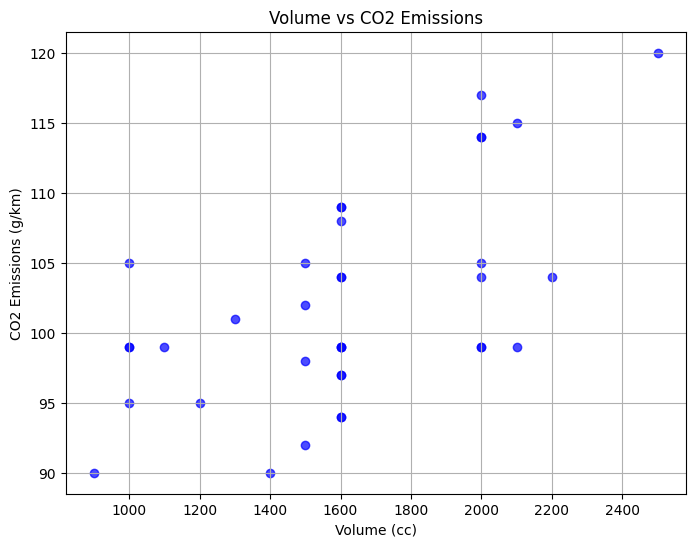

In [12]:
# Visualizing Relationships between Variables

# Scatter plot: Volume vs CO2
plt.figure(figsize=(8, 6))
plt.scatter(data['Volume'], data['CO2'], color='blue', alpha=0.7)
plt.title('Volume vs CO2 Emissions')
plt.xlabel('Volume (cc)')
plt.ylabel('CO2 Emissions (g/km)')
plt.grid(True)
plt.show()

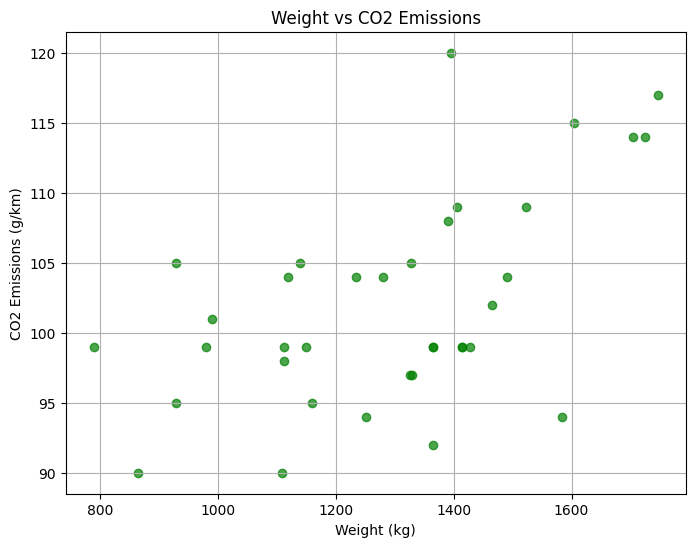

In [13]:
# Scatter plot: Weight vs CO2
plt.figure(figsize=(8, 6))
plt.scatter(data['Weight'], data['CO2'], color='green', alpha=0.7)
plt.title('Weight vs CO2 Emissions')
plt.xlabel('Weight (kg)')
plt.ylabel('CO2 Emissions (g/km)')
plt.grid(True)
plt.show()

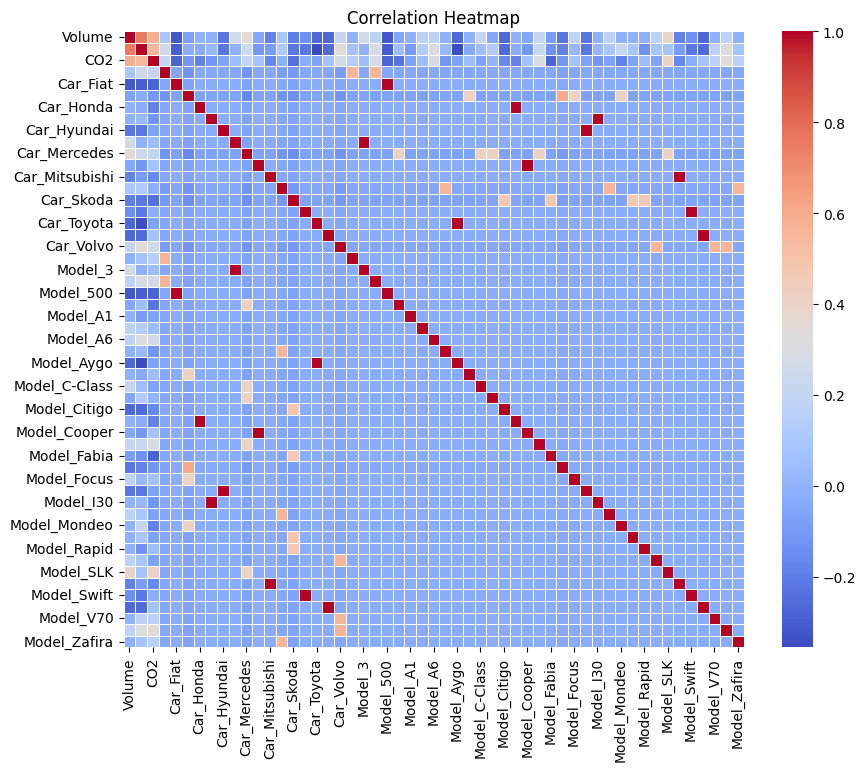

In [14]:
# Checking for Correlations

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

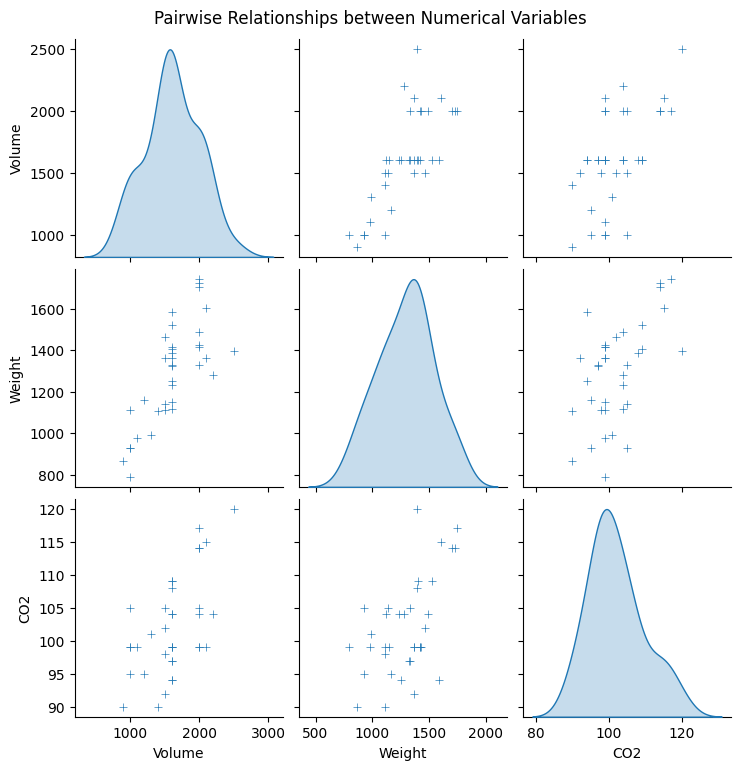

In [15]:
# Identifying Patterns and Trends in the Data

# Pair plot for numerical features
numerical_columns = ['Volume', 'Weight', 'CO2']
sns.pairplot(data[numerical_columns], diag_kind='kde', markers='+')
plt.suptitle('Pairwise Relationships between Numerical Variables', y=1.02)
plt.show()

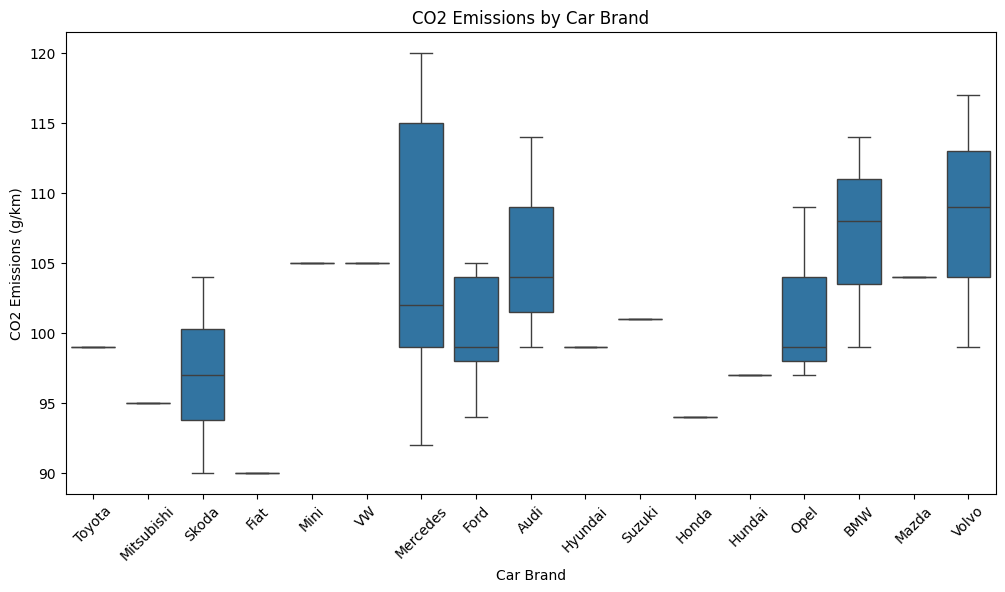

In [16]:
# Box plot for CO2 emissions by Car brands
plt.figure(figsize=(12, 6))
sns.boxplot(x='Car', y='CO2', data=data)
plt.title('CO2 Emissions by Car Brand')
plt.xticks(rotation=45)
plt.ylabel('CO2 Emissions (g/km)')
plt.xlabel('Car Brand')
plt.show()

In [17]:
# Ensure all numerical data is clean and properly formatted
numerical_data = data[['Volume', 'Weight', 'CO2']].copy()
numerical_data_clean = numerical_data.apply(pd.to_numeric, errors='coerce')
# Drop rows with NaN values after coercing to numeric
numerical_data_clean = numerical_data_clean.dropna()

# Check for non-numeric or invalid entries in the numerical columns
print("Inspecting numerical data for invalid entries:")
print(numerical_data_clean.describe())
print("\nChecking for non-numeric values:")
print(numerical_data_clean.isna().sum())

# Force conversion to numeric and drop any remaining invalid rows
numerical_data_clean = numerical_data_clean.apply(pd.to_numeric, errors='coerce').dropna()

# Re-check the cleaned data
print("\nCleaned Numerical Data Summary:")
print(numerical_data_clean.describe())

Inspecting numerical data for invalid entries:
            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000

Checking for non-numeric values:
Volume    0
Weight    0
CO2       0
dtype: int64

Cleaned Numerical Data Summary:
            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000


###**Model Training**

01. The model is trained using the training dataset.

02. The goal is to minimize the cost function: $J(\beta )= \frac{1}{2m}\sum_{i=1}^{m}(y_i - y\hat{}_i)^2$


where:

 - $m$: Number of training examples,

 - $y_i$: Actual value,

 - $y\hat{}_i$: Predicted value.

 __________________________________________

### **Predictions on Test Set**

Use the trained model to predict  values on the test set. These predictions are compared with the actual target values for evaluation.

_____________________________________________

###**Model Evaluation**

**01. Mean Squared Error (MSE):**
Measures the average squared difference between actual and predicted values: $MSE =  \frac{1}{n}\sum_{i=1}^{n}(y_i - y\hat{}_i)^2$


**02.R² Score:**Indicates the proportion of variance explained by the model: $R^2 = 1 - \frac{SS(res)}{SS(tot)}$


where:

 - $SS(res)$ = Residual Sum of Squares = $\sum (y_i - y\hat{}_i)^2$ ,

 - $SS(tot)$= Total Sum of Squares =$\sum (y_i - y\bar{})^2$ .

 ____________________________________________

### **Advanced Regression Models**

**1. Ridge Regression**
Adds an $L_2$ regularization penalty to prevent overfitting:

$J(\beta) = \frac{1}{2m}\sum_{i=1}^m(y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^n\beta_j^2$

Where:

$\alpha:$ Regularization strength.

**2. Lasso Regression**
Adds an $L_1 $regularization penalty to enforce sparsity in coefficients:

$J(\beta) = \frac{1}{2m}\sum_{i=1}^m(y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^n|\beta_j|$

**3. Decision Trees**

Splits the data into subsets based on feature thresholds, optimizing a splitting criterion (e.g., Gini Index, Information Gain).

______________________________________________

### **Model Comparison and Selection**

01. Evaluate all models using **MSE** and **R².**

02. Compare:

  - **Accuracy** (e.g., lower MSE, higher R²),

   - **Interpretability** (linear models are simpler than decision trees).

03. Choose the model that balances **accuracy and simplicity** for your use case.

In [18]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predicctions and evaluation for Linear Regression
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"MSE: {mse_linear:.2f}, R²: {r2_linear:.2f}")

Linear Regression:
MSE: 88.07, R²: -0.02


In [22]:
from sklearn.linear_model import Ridge,Lasso
# Ridge Regression Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions and evaluation for Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression:")
print(f"MSE: {mse_ridge:.2f}, R²: {r2_ridge:.2f}")


Ridge Regression:
MSE: 80.58, R²: 0.07


In [23]:
# Lasso Regression Model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predictions and evaluation for Lasso Regression
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression:")
print(f"MSE: {mse_lasso:.2f}, R²: {r2_lasso:.2f}")


Lasso Regression:
MSE: 89.04, R²: -0.03


In [24]:
# Decision Tree Regressor Model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predictions and evaluation for Decision Tree Regressor
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecision Tree Regressor:")
print(f"MSE: {mse_tree:.2f}, R²: {r2_tree:.2f}")

# Model Comparison
model_comparison = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Decision Tree"],
    "MSE": [mse_linear, mse_ridge, mse_lasso, mse_tree],
    "R²": [r2_linear, r2_ridge, r2_lasso, r2_tree]
}



Decision Tree Regressor:
MSE: 108.81, R²: -0.26


In [25]:
comparison_df = pd.DataFrame(model_comparison)
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
               Model         MSE        R²
0  Linear Regression   88.071995 -0.016888
1   Ridge Regression   80.575229  0.069671
2   Lasso Regression   89.038010 -0.028041
3      Decision Tree  108.806410 -0.256289


###**Performance Metrics Overview**

 - **Mean Squared Error (MSE):**

   - Measures the **average squared difference** between actual and predicted values.

   - **Low MSE** is better as it indicates smaller prediction errors.

 - **R² Score:**

   - Measures the proportion of variance in the target variable explained by the model.

   - Values range from **-∞ to 1.**

   - **Higher R²** is better, with values closer to 1 indicating a better fit.
____________________________________________

### **1. Linear Regression**

 - **MSE:** 88.07
(**moderately high**)

   - Indicates the model has significant error in predicting CO2 emissions.

 - **R²: -0.02 (negative)**

   - A negative R² means the model performs worse than predicting the mean of the target variable.

**Key Insight:**

 - The model struggles to explain the relationship between features and CO2 emissions.

 - **Linear Regression** may not be ideal for this dataset, potentially due to insufficient data or **non-linear relationships.**

 ____________________________________________

### **2. Ridge Regression**

 - **MSE:** 80.58 (lowest among all models)

   - Indicates improved prediction accuracy compared to other models.

 - **R²:** 0.07 (positive but low)

   - Suggests the model explains 7% of the variance in CO2 emissions, slightly better than other models.

**Key Insight:**

 - **Ridge Regression** performs best due to its regularization, which helps prevent overfitting in small datasets.

 - Its explanatory power remains weak, indicating **other factors** might influence CO2 emissions.

 ____________________________________________

### **3. Lasso Regression**

 - **MSE:** 89.04 (slightly higher than Linear Regression)

   - Indicates comparable performance to Linear Regression in prediction error.

 - **R²:** -0.03 (**negative**)

  - A negative R² suggests the model does not fit the data well and performs worse than predicting the mean.

**Key Insight:**

 - **Lasso Regression** fails to improve over Linear Regression, possibly because it oversimplifies the model by assigning some coefficients to zero.

 - It is not suitable for this dataset.
 ____________________________________________

### **4. Decision Tree Regressor**

 - **MSE:** 108.81 (**highest among all models**)

   - Indicates the poorest prediction accuracy.

 - **R²:** -0.26 (**highly negative**)

   - A highly negative R² suggests the model severely overfits the training data and fails to generalize.

**Key Insight:**

 - **Decision Tree Regressor** performs poorly due to **overfitting.**

 - It splits the data too finely, which is problematic given the small dataset size.

 - Regularization techniques (e.g., **pruning**) or ensemble methods (e.g., Random Forest) may be required.
 ____________________________________________

###**General Recommendations**

**01. Ridge Regression:**  

 - The **most suitable model** in this scenario.

 - It still requires **feature engineering** or additional data to improve performance.

**02. Linear and Lasso Regression:**

 - Offer baseline results but lack explanatory power.

**03. Decision Tree Regressor:**

 - **Not recommended **due to overfitting, but could improve with ensemble techniques (e.g., Random Forest, Gradient Boosting).

 __________________________________________

### **Feature Engineering (Optional)**

Feature engineering enhances the **predictive power** of the dataset by creating **new features** or transforming **existing ones.** For this analysis, we consider the following techniques:

______________________________________________

###**1. Polynomial Features**

Polynomial features introduce **non-linear relationships** by including **higher-order terms **of existing variables. This can help capture non-linear trends in the data.

For example:

 - If the dataset has Weight and Volume, polynomial features could include:

  - $Weight^2,Volume^2$

,

  - Interaction terms like
$Weight * Volume$

This transformation can be applied using tools like `PolynomialFeatures` from the `sklearn.preprocessing` module.

**Steps:**

01. Define the degree of polynomial (e.g., degree 2 for quadratic terms).

02. Transform the original features into polynomial features.

03. Use these new features in the regression model.

**Benefits:**

 - Helps linear models capture non-linear relationships.

**Caution:**

 - Increases the **dimensionality** of the dataset, which may lead to **overfitting** if not managed properly.
 _____________________________________________

### **2. Interaction Terms**

Interaction terms capture the **combined effect** of two or more features on the target variable. These are particularly useful when the relationship between features and the target is influenced by **feature interactions.**

For example:

 - $Interaction Term = Weight \times Volume$


**Steps:**

01. Identify **pairs of features** that may interact.

02. Multiply these **features** to create new interaction terms.

03. Include these **terms** as additional features in the model.

**Benefits:**

 - Provides more nuanced insights into relationships between features and CO₂.

 _______________________________________________

### **3. Feature Scaling**

Feature scaling standardizes or normalizes feature values to bring them into a consistent **range**, improving **model convergence** and **performance** for models sensitive to feature magnitudes (e.g., Ridge and Lasso Regression).

**Techniques:**

01. **Standardization:**

   - Centers data around zero with unit variance.

   - Formula:
   
   $Z=\frac{x-\mu}{\sigma}$
   , where:

 - $\mu$ is the mean,

 - $\sigma$ is the standard deviation.

**02. Normalization:**

 - Scales features to a range (e.g., 0 to 1).

 - Formula: ${x}'= \frac{x - x_min}{x_max - x_min}$

**Steps:**

01. Apply scaling to **numerical features** (e.g., `Weight`, `Volume`).

02. Use `StandardScaler` or `MinMaxScaler` from `sklearn.preprocessing`.

Benefits:

 - Ensures **fair weightage** of features during model training.

 - Necessary for **regularized models** (Ridge, Lasso) and **distance-based algorithms.**

 _____________________________________________

### **Key Considerations**

 - **Polynomial features** and **interaction terms** should be used cautiously to avoid **overfitting**, especially with small datasets.

 - **Feature scaling** is generally recommended for all models, except for tree-based **methods** (e.g., Decision Trees).

In [26]:
# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)  # Include second-degree terms and interaction terms
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Polynomial Features Shape (Train): {X_train_poly.shape}")
print(f"Polynomial Features Shape (Test): {X_test_poly.shape}")


# Feature Scaling
# Standardization
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train_poly)
X_test_standard = scaler_standard.transform(X_test_poly)

print("\nStandardized Features (Example - First Row):")
print(X_train_standard[0])

# Normalization
scaler_minmax = MinMaxScaler()
X_train_normalized = scaler_minmax.fit_transform(X_train_poly)
X_test_normalized = scaler_minmax.transform(X_test_poly)

print("\nNormalized Features (Example - First Row):")
print(X_train_normalized[0])

Polynomial Features Shape (Train): (28, 1430)
Polynomial Features Shape (Test): (8, 1430)

Standardized Features (Example - First Row):
[-0.12467575 -0.59638797 -0.2773501  ...  0.          0.
 -0.19245009]

Normalized Features (Example - First Row):
[0.46153846 0.34438503 0.         ... 0.         0.         0.        ]


### **Model Optimization**

To improve model performance, optimization techniques such as **hyperparameter tuning** and **cross-validation** are applied. These methods help find the best model configuration and ensure robustness in predictions.

______________________________________________

**1. Hyperparameter Tuning**

Hyperparameter tuning involves systematically searching for the best configuration of **hyperparameters** for the model. Unlike** model parameters** (learned from data), hyperparameters are set manually and can significantly impact model performance.

**Techniques:**

01. Grid Search:

  - Exhaustively searches through a predefined set of hyperparameter values.

  - Example: For Ridge regression, test different values of ( \alpha ) (regularization strength).

**02. Random Search:**

  - Randomly samples hyperparameter values from a defined range.

  - More efficient than Grid Search for large search spaces.

03. Bayesian
Optimization (optional):

  - Uses probabilistic models to guide the search for optimal hyperparameters.

**Steps for Linear Models **(e.g., Ridge, Lasso):

01. Define the **hyperparameters** to tune:

  - **Ridge:** Regularization strength (( \alpha )).

  - **Lasso:** Regularization strength (( \alpha )).

02. Use `GridSearchCV` or `RandomizedSearchCV` from `sklearn.
model_selection` to perform the search.

03. Evaluate the best **hyperparameter configuration** using **cross-validation**
____________________________________________________

### **2. Cross-Validation**

Cross-validation assesses the model's performance by splitting the dataset into multiple subsets (**folds**). The model is trained and tested on different subsets, ensuring robust **evaluation.**

**Techniques:**

**01. K-Fold Cross-Validation:**

  - Divides the data into ( k ) **folds.**

  - The model is trained on ( k-1 ) **folds** and tested on the remaining fold.

  - This process is repeated ( k ) times, and the average score is used as the final metric.

  - Commonly used values: ( k = 5 ) or ( k = 10 ).

**02. Leave-One-Out Cross-Validation (LOOCV):**

  - Each data point acts as a test set, while the rest form the training set.

  - Suitable for small datasets but computationally expensive.
  

03. **Stratified K-Fold:**

  - Ensures that class distributions are preserved across folds (useful for imbalanced datasets).
_____________________________________________

### **Implementation Steps:**

01. **Grid Search with Cross-Validation**: Combine **hyperparameter tuning** with `cross-validation` using `GridSearchCV`.

Example for Ridge regression:

**02. Evaluate Model Performance:**

  - Use the best model on the test set to check MSE and R² scores.

  - Compare with baseline models to confirm improvement.

### **Key Benefits:**

  - **Hyperparameter tuning** ensures the model is not **overfitting** or **underfitting**.

  - **Cross-validation** reduces bias and variance in performance estimates.

In [30]:
# Hyperparameter Tuning for Ridge Regression
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_standard, y_train)

best_ridge_model = ridge_grid.best_estimator_
best_ridge_params = ridge_grid.best_params_
best_ridge_score = ridge_grid.best_score_

print("Ridge Regression Best Parameters:", best_ridge_params)
print("Ridge Regression Best Cross-Validation R² Score:", best_ridge_score)

Ridge Regression Best Parameters: {'alpha': 0.1}
Ridge Regression Best Cross-Validation R² Score: -0.14696392372833883


In [31]:
# Hyperparameter Tuning for Lasso Regression
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_standard, y_train)

best_lasso_model = lasso_grid.best_estimator_
best_lasso_params = lasso_grid.best_params_
best_lasso_score = lasso_grid.best_score_

print("\nLasso Regression Best Parameters:", best_lasso_params)
print("Lasso Regression Best Cross-Validation R² Score:", best_lasso_score)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.409e-01, tolerance: 8.733e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.362e-01, tolerance: 7.498e-02
  model = cd_fast.enet_coordinate_descent(



Lasso Regression Best Parameters: {'alpha': 1.0}
Lasso Regression Best Cross-Validation R² Score: -0.24280780737546093


In [32]:
# Hyperparameter Tuning for Decision Tree Regressor
tree_params = {'max_depth': [2, 5, 10, None], 'min_samples_split': [2, 5, 10]}
tree_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_params, cv=5, scoring='r2')
tree_grid.fit(X_train, y_train)

best_tree_model = tree_grid.best_estimator_
best_tree_params = tree_grid.best_params_
best_tree_score = tree_grid.best_score_

print("\nDecision Tree Regressor Best Parameters:", best_tree_params)
print("Decision Tree Regressor Best Cross-Validation R² Score:", best_tree_score)



Decision Tree Regressor Best Parameters: {'max_depth': 2, 'min_samples_split': 2}
Decision Tree Regressor Best Cross-Validation R² Score: -0.37895329519435894


In [35]:
# Cross-Validation Scores for the Best Models
ridge_cv_score = cross_val_score(best_ridge_model, X_train_standard, y_train, cv=5, scoring='r2').mean()
lasso_cv_score = cross_val_score(best_lasso_model, X_train_standard, y_train, cv=5, scoring='r2').mean()
tree_cv_score = cross_val_score(best_tree_model, X_train, y_train, cv=5, scoring='r2').mean()

print("\nCross-Validation Scores for Best Models:")
print(f"Ridge Regression CV R²: {ridge_cv_score:.4f}")
print(f"Lasso Regression CV R²: {lasso_cv_score:.4f}")
print(f"Decision Tree Regressor CV R²: {tree_cv_score:.4f}")



Cross-Validation Scores for Best Models:
Ridge Regression CV R²: -0.1470
Lasso Regression CV R²: -0.2428
Decision Tree Regressor CV R²: -0.3790


### **1. Ridge Regression**

 - **Best Parameters**: alpha = 0.1

 **- Cross-Validation** R²
Score: -0.147   

**Insight:**

 - **Ridge Regression** performed the best among the models. The regularization term reduces overfitting and stabilizes predictions. However, the negative R² score indicates that the model still underperforms compared to the mean prediction.

 - **Why Low R² is Bad**:

 - Negative **R²** means the model performs worse than simply predicting the mean target value for all instances, indicating **limited predictive power.**

 __________________________________________

### **2. Lasso Regression**

 - **Best Parameters**: alpha = 1.0

 - **Cross-Validation** R² Score: -0.243

**Insight:**

**Lasso Regression,** which enforces sparsity in feature selection, performed worse than Ridge. It may have overly simplified the model by assigning zero coefficients to features still important for prediction.

**Why Low R² is Bad**:

 - The **higher regularization strength** led to **underfitting**, causing the model to lose critical relationships between features and the target variable.
 ______________________________________________

###**3. Decision Tree Regressor**

 - **Best Parameters**: `max_depth` = 2, `min_samples_split` = 2

 - **Cross-Validation** R² Score: -0.379

**Insight:**

 - **Decision Tree Regressor** performed the worst, indicating overfitting or failure to generalize well on the small dataset. Its reliance on discrete splits may have led to poor predictions for continuous
variables.

**Why Low R² is Bad**:

 - A **highly negative R² score** signifies the model not only fails to capture patterns but performs significantly worse than baseline predictions.

 ____________________________________________

### **Overall Insight**

 - **Best Model**: **Ridge Regression** with alpha = 0.1 showed the least negative R², indicating it is the **most stable and generalizable** among the models tested.

 - General Observation:

   - The consistently negative R² scores across all models highlight limitations in the dataset:

01. **Insufficient data size** for reliable training and testing.

02. Possible **missing or unobserved features** that contribute to CO2 emissions.

03. **Linear assumptions** (even with regularization) may not capture the complex relationships in the data.

_____________________________________________

### **Next Steps**

01. Dataset Expansion:

 - Collect more observations to enhance model performance and reduce variance.

 - Include diverse vehicle types, such as electric and hybrid vehicles, for broader analysis.

02. **Feature Engineering:**

 - Add critical features like fuel efficiency, engine type, and aerodynamics.

 - Introduce polynomial and interaction terms to capture non-linear patterns.

**03. Modeling Improvements:**

 - Explore ensemble models, such as Random Forest or Gradient Boosting, to address non-linearity and overfitting issues.

 - Experiment with non-linear techniques like **Support Vector Machines** (SVM) or Neural Networks for better pattern recognition.

**04. Regularization Tuning:**

 - Perform finer **hyperparameter searches** for Ridge and Lasso to optimize regularization strength.

**05. Error Analysis:**

 - Analyze residuals to identify **outliers** and cases where predictions deviate significantly from actual values.
 ______________________________________________

### **Model Performance Metrics**

The performance of the trained model is evaluated using the following **metrics:**
_________________________________________________

###**1. Mean Squared Error (MSE)**

MSE measures the **average squared differences** between actual and predicted CO2 emissions:

$\text{MSE} = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2$

Where:

 - $y_i$: Actual CO2 emission,

 - $\hat{y}_i$: Predicted CO2 emission,

 - $n$: Number of data points.

**Lower MSE** indicates better model performance.
____________________________________________

### **2. R² Score**

The R² score indicates how well the model explains the **variance** in CO2 emissions: $R^2=1 - \frac{SS_res}{SS_tot}$


Where:

$SS_res= \sum_{i=1}^{n}(y_i - y\hat{}_i)^2$: Residual Sum of Squares,

$SS_tot = \sum_{i=1}^{n}(y_i - y\hat{}_i)^2$: Total Sum of Squares,

$\bar{y}$: Mean of actual CO2 emissions.

An **R² score closer to 1** indicates a **good fit**, while values near 0 suggest poor predictive performance.

_______________________________________________

### **Analysis of Predicted vs. Actual CO2 Emissions**

**1. Residual Analysis**

Residuals are the differences between actual and predicted CO2 emissions:$Residual = y_i - ŷ_i$


 - A plot of residuals vs. predicted values can reveal patterns.

 - **Randomly scattered residuals** indicate a good fit.

 - Patterns (e.g., curves) suggest **model misspecification.**

 _____________________________________________

### **2. Scatter Plot of Actual vs. Predicted**

A scatter plot comparing actual and predicted CO2 emissions:

 - Ideally, the points should align along a **45-degree line**.

 - Deviations from this line indicate areas where the model **underperforms.**
 _____________________________________________

### **3. Distribution of Errors**

A histogram of residuals can help identify if errors are **normally distributed**:

 - A **normal distribution** of errors indicates a well-fitted model.

 - **Skewed** or heavy-tailed distributions suggest bias or outliers.
 __________________________________________________

### **Limitations of the Model**

1. **Linear Assumption**:
The linear regression model assumes a linear relationship, which may not capture complex patterns.

2. **Limited Dataset**: With only 36 data points, the model is prone to overfitting and lacks generalization capability.

3. **Feature Interaction:** Simple linear models may not fully capture interactions between features like Weight and Volume.

4. **Feature Selection:** Important features might be missing, such as fuel type, engine efficiency, or aerodynamics.

5. **Categorical Encoding:** Encoding Car and Model into many binary features can increase dimensionality, reducing performance on small datasets.

6. **Outliers and Noise: Outliers** in the dataset can disproportionately influence predictions.

Model Performance Metrics:
               Model         MSE        R²
0  Linear Regression   88.071995 -0.016888
1   Ridge Regression   80.575229  0.069671
2   Lasso Regression   89.038010 -0.028041
3      Decision Tree  108.806410 -0.256289


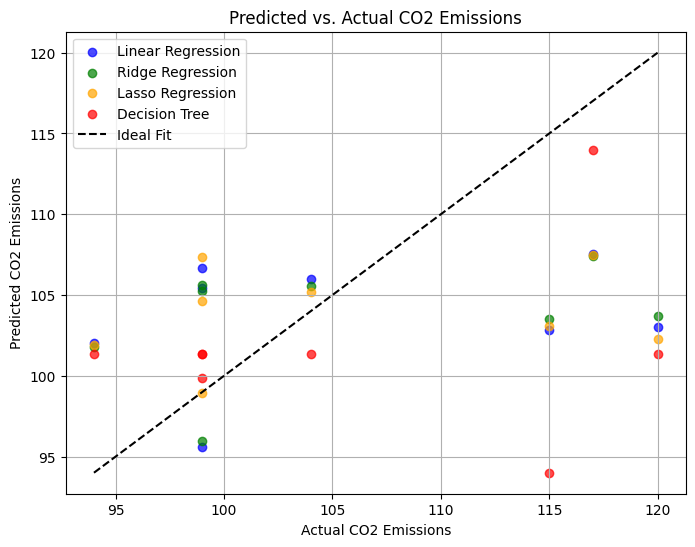

In [36]:
# Model Performance Metrics
metrics = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Decision Tree"],
    "MSE": [mse_linear, mse_ridge, mse_lasso, mse_tree],
    "R²": [r2_linear, r2_ridge, r2_lasso, r2_tree],
}


metrics_df = pd.DataFrame(metrics)
print("Model Performance Metrics:")
print(metrics_df)

# Analysis of Predicted vs. Actual CO2 Emissions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.7, color='blue', label="Linear Regression")
plt.scatter(y_test, y_pred_ridge, alpha=0.7, color='green', label="Ridge Regression")
plt.scatter(y_test, y_pred_lasso, alpha=0.7, color='orange', label="Lasso Regression")
plt.scatter(y_test, y_pred_tree, alpha=0.7, color='red', label="Decision Tree")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Ideal Fit")
plt.title("Predicted vs. Actual CO2 Emissions")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.legend()
plt.grid(True)
plt.show()


##**Conclusion and Recommendations**
_______________________________________________
###**Summary of Findings**

1. **Model Performance:**

   - Ridge Regression showed the best results, with:

     - MSE: 80.58

     - R²: 0.07

  - Other models (Linear, Lasso, and Decision Tree) underperformed, with negative R² scores, indicating weak predictive capabilities.

  - The limited dataset size and missing features contributed to poor generalization across all models.

**Insights:**

  - Weight and Volume showed moderate correlations with CO2 emissions but did not fully explain variance.

  - Ridge Regression reduced overfitting with regularization, but the overall performance was still unsatisfactory due to inherent dataset limitations.

  ______________________________________________

### **Potential Improvements**

1. **Expand Dataset:**

 - Collect **more data points** to enhance model reliability and mitigate overfitting.

2.** Add Features:**

 - Incorporate variables such as:

   - Engine type

   - Fuel efficiency

   - Aerodynamics

   - Driving conditions

 - These additions would capture more factors affecting CO2 emissions.

3. **Explore Advanced Models:**

 - Implement ensemble methods like:

  - Random Forest

  - Gradient Boosting

 - Leverage deep learning for improved accuracy if sufficient data becomes available.

4. **Feature Engineering:**

 - Introduce interaction terms and polynomial features to capture complex relationships.

 - Perform feature selection to reduce noise and improve model efficiency.

5. **Regularization:**

 - Fine-tune hyperparameters for Ridge and Lasso Regression to achieve better bias-variance trade-offs.
__________________________________________________

### **Future Work**

1. **Real-Time Data Integration:**

 - Use IoT sensors to collect real-time vehicle data for dynamic CO2 prediction and monitoring.

**2. Policy Implications:**

 - Leverage model insights to guide emissions policies and develop eco-friendly vehicle standards.

**3. Explainable AI:**

 - Create interpretable models to provide actionable recommendations for manufacturers and policymakers.

**4. Data Augmentation:**

 - Generate synthetic data to address the dataset size issue, improving training without extensive data collection efforts.

**5. Cross-Domain Applications:**

 - Apply similar modeling approaches to other areas, such as:

   - Energy efficiency

   - Industrial emissions

   - Smart city initiatives

 - Broaden the impact for addressing environmental challenges.

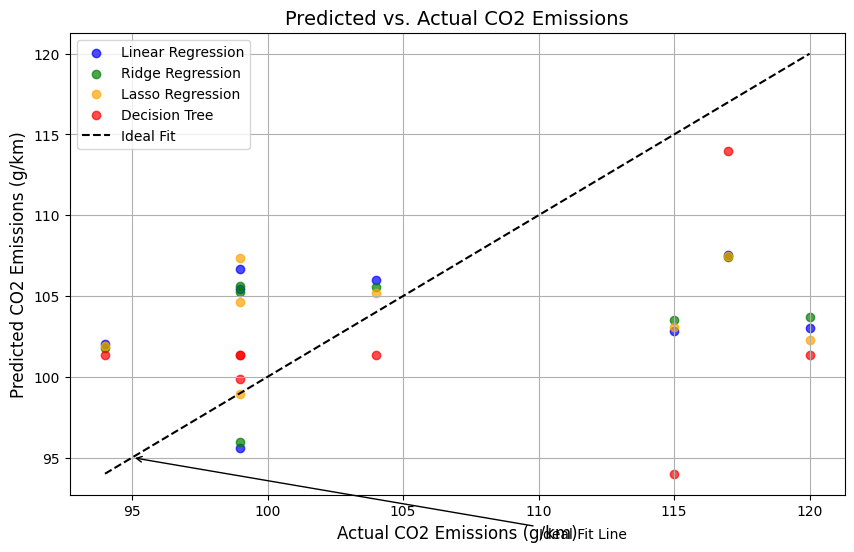

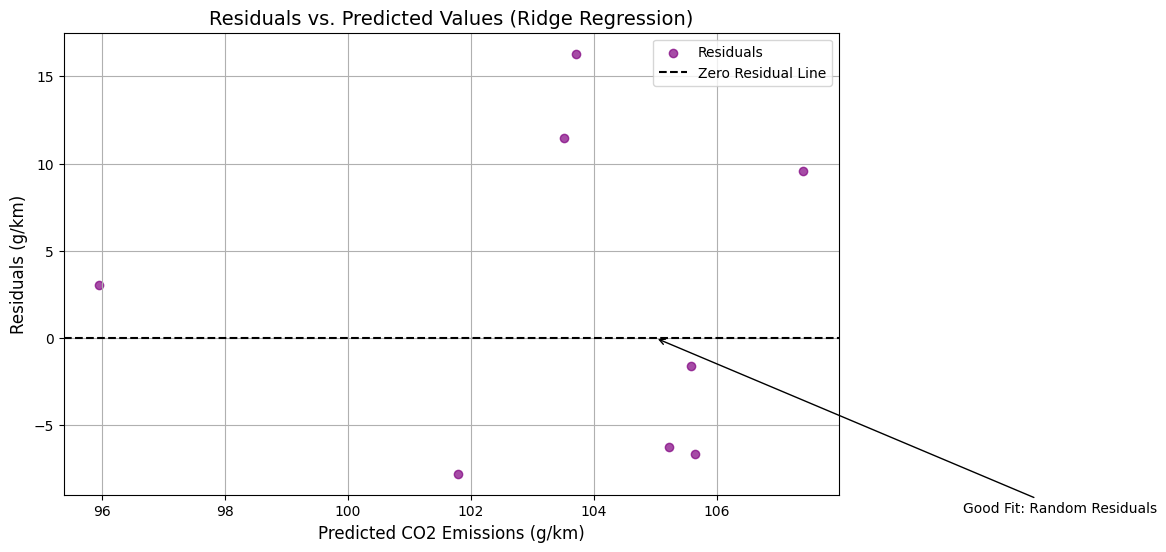

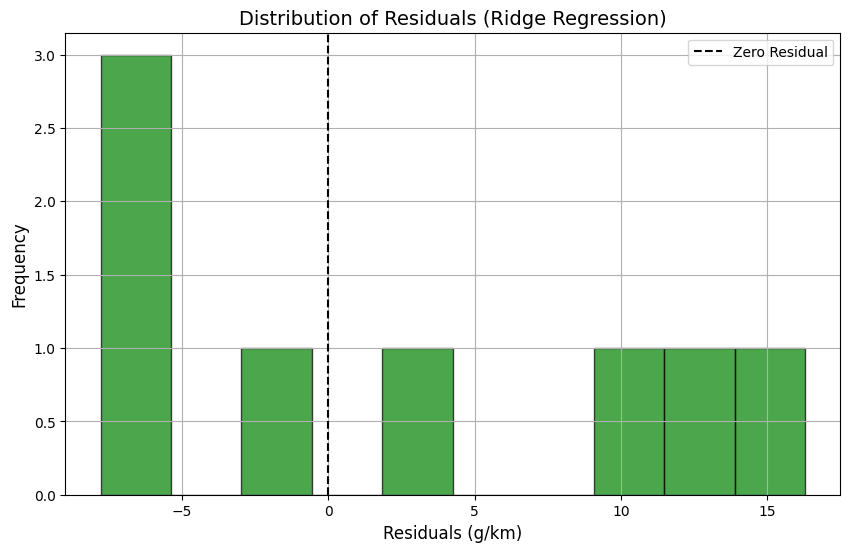

In [37]:
# Visualizing Model Performance Metrics and Annotated Plots

# Scatter plot of Predicted vs. Actual CO2 Emissions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.7, label="Linear Regression")
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.7, label="Ridge Regression")
plt.scatter(y_test, y_pred_lasso, color='orange', alpha=0.7, label="Lasso Regression")
plt.scatter(y_test, y_pred_tree, color='red', alpha=0.7, label="Decision Tree")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Ideal Fit")
plt.title("Predicted vs. Actual CO2 Emissions", fontsize=14)
plt.xlabel("Actual CO2 Emissions (g/km)", fontsize=12)
plt.ylabel("Predicted CO2 Emissions (g/km)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.annotate('Ideal Fit Line', xy=(95, 95), xytext=(110, 90),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
plt.show()

# Residual Analysis
residuals_ridge = y_test - y_pred_ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, residuals_ridge, color='purple', alpha=0.7, label="Residuals")
plt.axhline(y=0, color='black', linestyle='--', label="Zero Residual Line")
plt.title("Residuals vs. Predicted Values (Ridge Regression)", fontsize=14)
plt.xlabel("Predicted CO2 Emissions (g/km)", fontsize=12)
plt.ylabel("Residuals (g/km)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.annotate('Good Fit: Random Residuals', xy=(105, 0), xytext=(110, -10),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_ridge, bins=10, color='green', alpha=0.7, edgecolor='black')
plt.title("Distribution of Residuals (Ridge Regression)", fontsize=14)
plt.xlabel("Residuals (g/km)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', label="Zero Residual")
plt.legend(fontsize=10)
plt.annotate('Zero Residual Line', xy=(0, 5), xytext=(5, 7),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
plt.grid(True)
plt.show()
